In [1]:
library(tidyverse)
library(tidymodels)
library(repr)
library(readxl)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", destfile = "cleveland_data")

In [14]:
heart_disease_data <- read_delim("cleveland_data", col_names = FALSE, skip=20, delim= ",")
heart_disease_data

Rows: 283 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
64,1,1,110,211,0,2,144,1,1.8,2,0.0,3.0,0
58,0,1,150,283,1,2,162,0,1.0,1,0.0,3.0,0
58,1,2,120,284,0,2,160,0,1.8,2,0.0,3.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [15]:
names(heart_disease_data) <- c("age", "sex", "chest_pain", "resting_bp", "cholesterol", "fasting_blood_sugar", "resting_electro", "max_hr", "ex_angina", "oldpeak", "slope", "ca", "thal", "num")
heart_disease_data <- heart_disease_data |>
mutate(sex = case_when(sex == 1 ~ "male" , sex == 0 ~ "female"))|>
mutate(chest_pain = case_when(chest_pain == 1 ~ "typical angina", chest_pain == 2 ~ "atypical angina", chest_pain == 3 ~ "non-anginal pain", chest_pain == 4 ~ "asymptomatic"))|>
mutate(fasting_blood_sugar = case_when(fasting_blood_sugar == 1 ~ "true" , fasting_blood_sugar == 0 ~ "false"))|>
mutate(resting_electro = case_when(resting_electro == 0 ~ "normal", resting_electro == 1 ~ "abnormal", resting_electro == 2 ~ "hypertrophy"))|>
mutate(ex_angina = case_when(ex_angina == 1 ~ "yes" , ex_angina == 0 ~ "no"))|>
mutate(slope = case_when(slope == 1 ~ "upsloping", slope == 2 ~ "flat", slope == 3 ~ "downsloping"))|>
mutate(thal = case_when(thal == "3.0" ~ "normal", thal == "6.0" ~ "fixed defect", thal == "7.0" ~ "reversable defect"))|>
mutate(num = case_when(num == 0 ~ "healthy" , num == 1 ~ "sick", num == 2 ~ "sick", num == 3 ~ "sick", num == 4 ~ "sick"))|>
mutate(num = as_factor(num))
heart_disease_data$ca[heart_disease_data$ca == "?"] <- NA
heart_disease_data$thal[heart_disease_data$thal == "?"] <- NA
heart_disease_data

age,sex,chest_pain,resting_bp,cholesterol,fasting_blood_sugar,resting_electro,max_hr,ex_angina,oldpeak,slope,ca,thal,num
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<fct>
64,male,typical angina,110,211,false,hypertrophy,144,yes,1.8,flat,0.0,normal,healthy
58,female,typical angina,150,283,true,hypertrophy,162,no,1.0,upsloping,0.0,normal,healthy
58,male,atypical angina,120,284,false,hypertrophy,160,no,1.8,flat,0.0,normal,sick
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,male,asymptomatic,130,131,false,normal,115,yes,1.2,flat,1.0,reversable defect,sick
57,female,atypical angina,130,236,false,hypertrophy,174,no,0.0,flat,1.0,normal,sick
38,male,non-anginal pain,138,175,false,normal,173,no,0.0,upsloping,NA,normal,healthy


In [16]:
heart_disease_split <- initial_split(heart_disease_data, prop = 0.75, strata = num)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split) 

In [17]:
heart_disease_table2 <- heart_disease_train |>
group_by(num, sex)|>
summarize(resting_bp = mean(resting_bp),
          cholesterol = mean(cholesterol),
          max_hr = mean(max_hr))
heart_disease_table2

`summarise()` has grouped output by 'num'. You can override using the `.groups`
argument.


num,sex,resting_bp,cholesterol,max_hr
<fct>,<chr>,<dbl>,<dbl>,<dbl>
healthy,female,127.8000,254.4400,154.8200
healthy,male,129.5714,232.7143,162.3492
sick,female,142.1579,270.3684,146.5263
sick,male,131.9625,246.9750,139.2750


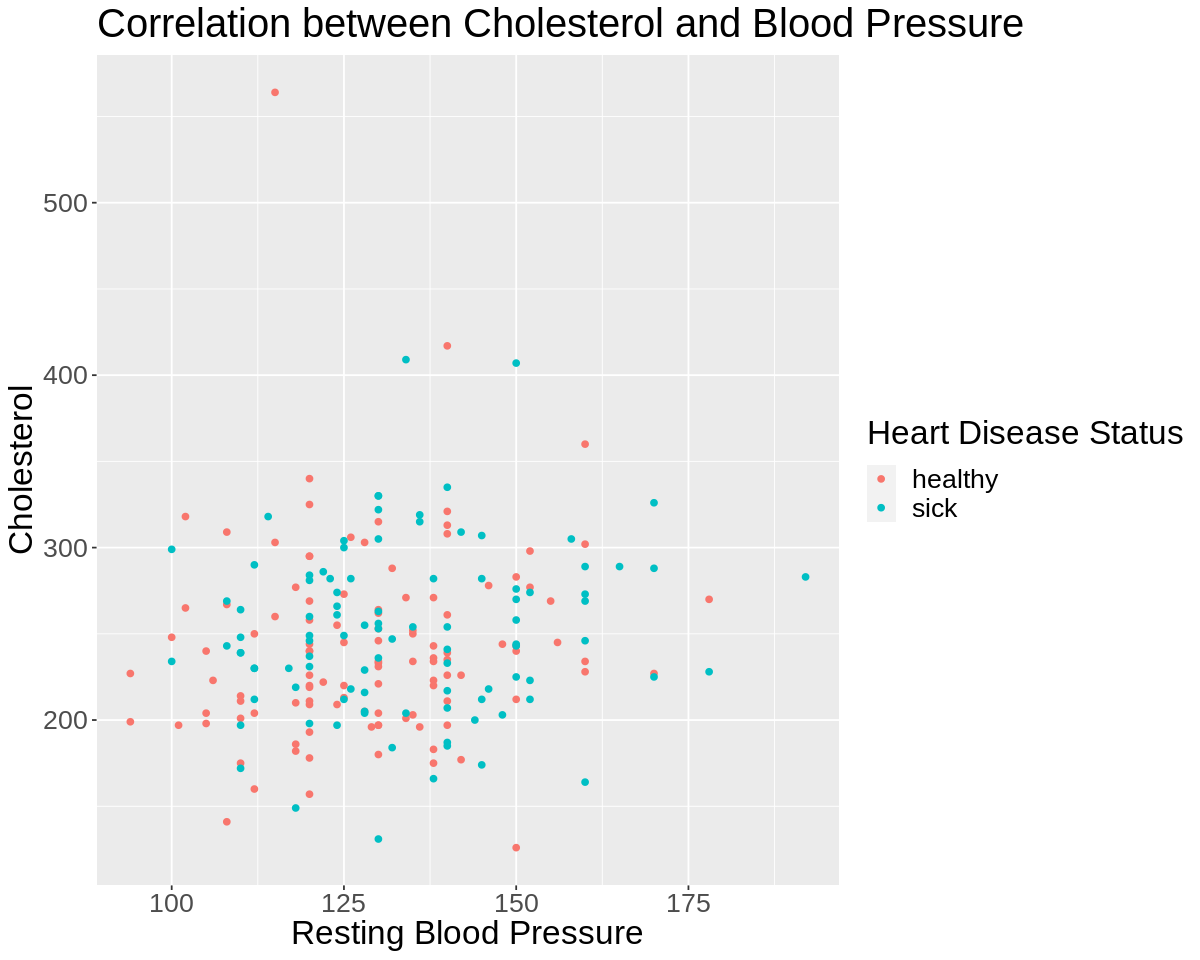

In [18]:
options(repr.plot.width = 10, repr.plot.height = 8) 
heart_disease_plot <- heart_disease_train |>
    ggplot(aes(x = resting_bp, y = cholesterol, colour = num)) + 
    geom_point()+ 
    labs(x = "Resting Blood Pressure", y = "Cholesterol", colour = "Heart Disease Status") +
    ggtitle("Correlation between Cholesterol and Blood Pressure") +
    theme(text = element_text(size = 20))
heart_disease_plot